In [ ]:
# ライブラリのインストール
!pip install scikit-learn==0.24.2 flaml==0.5.12

In [3]:
# ライブラリのインポート、インスタンスの作成（FLAML）
from flaml import AutoML
automl = AutoML()

In [4]:
# モデル探索のための設定
automl_settings = {
    "time_budget": 10,
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "iris.log",
}

In [5]:
# データを渡して読込みさせる
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [ ]:
# データの確認（がくと花弁の長さと幅）
X

In [ ]:
# データの確認（アヤメの種類）
y

In [ ]:
# データセット分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# モデルの探索
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

In [ ]:
# 最も効率のいいモデルを提示
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

In [ ]:
# モデルのインスタンスを表示
automl.model.estimator

In [ ]:
# 最も良いモデルでデータセットの精度をみる
y_pred = automl.predict(X_test)
print(y_pred)
print(y_test)

In [ ]:
# すべての総合的な精度をみる
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))

In [ ]:
# timebadgetを変更して精度を上げる
automl = AutoML()

automl_settings = {
    "time_budget": 300,
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "iris.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

In [ ]:
# 反映後の精度を表示する
y_pred = automl.predict(X_test)
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))

In [19]:
# 分類モデル探索の可視化（インポート）
from flaml.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = get_output_from_log(filename=automl_settings['log_file_name'], time_budget=60)

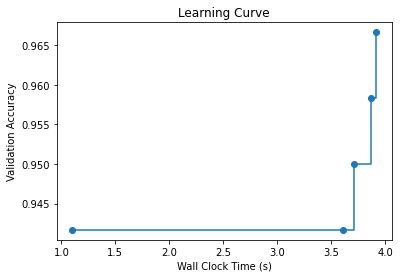

In [20]:
# 分類モデル探索の可視化（表示）
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

In [21]:
# FLAMLを用いた回帰
automl = AutoML()

automl_settings = {
    "time_budget": 10,
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": "boston.log",
}

In [23]:
# データの読込
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

In [ ]:
# データの確認
X

In [ ]:
# データの確認
y

In [ ]:
# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# モデルの探索
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

In [ ]:
# 最適モデルの提示
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

In [ ]:
# 最適モデルの結果表示
automl.model.estimator

In [ ]:
# データセットに対する精度
y_pred = automl.predict(X_test)
print(y_pred)
print(y_test)

In [ ]:
# データセｔットに対する精度
print('R2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('RMSE', '=', sklearn_metric_loss_score('rmse', y_pred, y_test))

In [ ]:
# 提示されたモデルでtimebadgetを増やして精度を上げる
automl = AutoML()

automl_settings = {
    "time_budget": 300,
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": "boston.log",
}

automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

In [ ]:
# 試行の結果を表示する
y_pred = automl.predict(X_test)
print('R2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('RMSE', '=', sklearn_metric_loss_score('rmse', y_pred, y_test))

In [ ]:
# 回帰のモデル探索を可視化
time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = get_output_from_log(filename=automl_settings['log_file_name'], time_budget=60)

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation R2')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()